# o1 mini with v2.17 prompt

This notebook outlines the steps undertook to generate a prediction using o1 mini with prompt from 2/17/25.

The prompt is adjusted from the other v2.17 prompts to better suite the reasoning model's style based on the documentation.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import reasoning_instructions_v217
MODEL_ID = "o1-mini-2024-09-12"
SYSTEM_PROMPT = reasoning_instructions_v217

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

In [3]:
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 7
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 5
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 50.2 s, sys: 7.34 s, total: 57.6 s
Wall time: 27min 27s


[{'0003.91306_cites_87633.txt': {'model': 'o1-mini-2024-09-12',
   'input_tokens': 1786,
   'output_tokens': 1362,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The Acting Case reaffirms the rules established in the Target Case, Murray v. Lardner, while adding specific exceptions. It does not explicitly or implicitly reverse or invalidate the Target Case.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The Acting Case reaffirms the rules established in the Target Case, Murray v. Lardner, while adding specific exceptions. It does not explicitly or implicitly reverse or invalidate the Target Case."\n}\n```'}},
 {'0001.91306_cites_88061.txt': {'model': 'o1-mini-2024-09-12',
   'input_tokens': 2541,
   'output_tokens': 1607,
   'prediction': 'yes',
   'confidence': 0.99,
   'rationale': 'The Acting Case explicitly states that the positions taken in Texas v. White must be regarded as overruled, indicating an explicit negative ac

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0003.91306_cites_87633.txt,o1-mini-2024-09-12,1786,1362,no,0.95,The Acting Case reaffirms the rules establishe...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0001.91306_cites_88061.txt,o1-mini-2024-09-12,2541,1607,yes,0.99,The Acting Case explicitly states that the pos...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
2,0004.91306_cites_88240.txt,o1-mini-2024-09-12,1762,2126,no,0.95,The Acting Case references and relies on Texas...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0007.91306_cites_89668.txt,o1-mini-2024-09-12,1758,721,no,0.95,"The passage references the Target Case, Cromwe...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0002.91306_cites_88994.txt,o1-mini-2024-09-12,2254,3140,no,0.95,The Acting Case references and discusses the T...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/6.gpt/8.o1_mini_v217_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

5

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/6.gpt/8.o1_mini_v217_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o1-mini-2024-09-12,2541,1607,yes,0.99,The Acting Case explicitly states that the pos...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o1-mini-2024-09-12,2254,3140,no,0.95,The Acting Case references and discusses the T...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o1-mini-2024-09-12,1786,1362,no,0.95,The Acting Case reaffirms the rules establishe...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o1-mini-2024-09-12,1762,2126,no,0.95,The Acting Case references and relies on Texas...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o1-mini-2024-09-12,1765,3533,no,0.95,The Acting Case references the Target Case (16...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     865
yes    219
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

3125103

In [16]:
eval_df["output_tokens"].sum()

2142197

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.94      0.87      0.91       935
         Yes       0.46      0.67      0.54       149

    accuracy                           0.85      1084
   macro avg       0.70      0.77      0.73      1084
weighted avg       0.88      0.85      0.86      1084



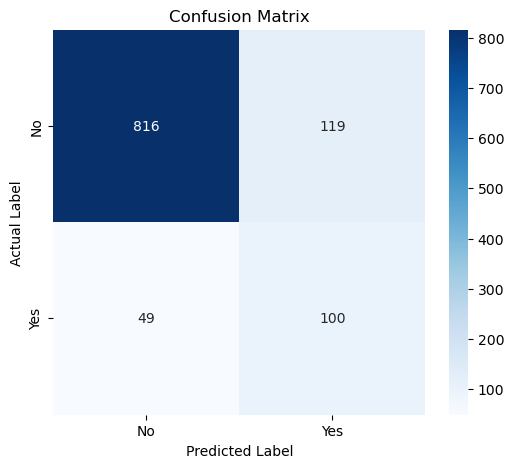

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.85
Precision: 0.46
Recall: 0.67
F-score: 0.54
Specificity: 0.87
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 100
True negatives: 816
False positives: 119
False negatives: 49


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

118

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

49

# Save the evaluation df

In [23]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o1-mini-2024-09-12,2541,1607,yes,0.99,The Acting Case explicitly states that the pos...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o1-mini-2024-09-12,2254,3140,no,0.95,The Acting Case references and discusses the T...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o1-mini-2024-09-12,1786,1362,no,0.95,The Acting Case reaffirms the rules establishe...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o1-mini-2024-09-12,1762,2126,no,0.95,The Acting Case references and relies on Texas...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o1-mini-2024-09-12,1765,3533,no,0.95,The Acting Case references the Target Case (16...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [24]:
eval_df.to_csv("predictions/6.gpt/8.o1_mini_v217_prompt_eval.csv", index=False)